# Exploratory Data Analysis (EDA) Visualization Using Pandas

## An Exploration on the "Medium" Dataset Using Pandas and Seaborn
<a href="https://dorianlazar.medium.com/scraping-medium-with-python-beautiful-soup-3314f898bbf5">Here</a> is a blog post that explains how the data was scraped.

This dataset contains information about randomly chosen medium articles published in 2019 from these 7 publications:

- Towards Data Science
- UX Collective
- The Startup
- The Writing Cooperative
- Data Driven Investor
- Better Humans
- Better Marketing

### 1. Know Your Data

import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import is_string_dtype, is_numeric_dtype

import data

In [2]:
df = pd.read_csv('dataset/medium_data.csv')

In [3]:
df.head(5)

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


#### info()
It gives the count of non-null values for each column and its data type.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6508 entries, 0 to 6507
Data columns (total 10 columns):
id              6508 non-null int64
url             6508 non-null object
title           6508 non-null object
subtitle        3479 non-null object
image           6361 non-null object
claps           6508 non-null int64
responses       6508 non-null object
reading_time    6508 non-null int64
publication     6508 non-null object
date            6508 non-null object
dtypes: int64(3), object(7)
memory usage: 508.5+ KB


#### describe( )
This function provides basic statistics of each column.

In [5]:
df.describe()

,id,claps,reading_time
count,6508.000000,6508.000000,6508.000000
mean,3254.500000,311.076060,6.134911
std,1878.842108,950.789896,3.231918
min,1.000000,0.000000,0.000000
25%,1627.750000,54.000000,4.000000
50%,3254.500000,115.000000,5.000000
75%,4881.250000,268.250000,7.000000
max,6508.000000,38000.000000,55.000000


In [6]:
df.describe(include = 'all')

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
count,6508.000000,6508,6508,3479,6361,6508.000000,6508,6508.000000,6508,6508
unique,NaN,6508,6504,3470,6361,NaN,56,NaN,7,50
top,NaN,https://towardsdatascience.com/ai-scares-the-p...,Lost in translation,"<em class=""markup--em markup--h4-em"">A weekly ...",5915.jpg,NaN,0,NaN,The Startup,2019-10-21
freq,NaN,1,2,5,1,NaN,3396,NaN,3041,197
mean,3254.500000,NaN,NaN,NaN,NaN,311.076060,NaN,6.134911,NaN,NaN
std,1878.842108,NaN,NaN,NaN,NaN,950.789896,NaN,3.231918,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN
25%,1627.750000,NaN,NaN,NaN,NaN,54.000000,NaN,4.000000,NaN,NaN
50%,3254.500000,NaN,NaN,NaN,NaN,115.000000,NaN,5.000000,NaN,NaN
75%,4881.250000,NaN,NaN,NaN,NaN,268.250000,NaN,7.000000,NaN,NaN


### missing value

In [7]:
df.isnull().sum()

id                 0
url                0
title              0
subtitle        3029
image            147
claps              0
responses          0
reading_time       0
publication        0
date               0
dtype: int64

In [6]:
missing_count = df.isnull().sum()
value_count   = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100,2)
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage})
print(missing_df)

              count  percentage
id                0        0.00
url               0        0.00
title             0        0.00
subtitle       3029       46.54
image           147        2.26
claps             0        0.00
responses         0        0.00
reading_time      0        0.00
publication       0        0.00
date              0        0.00


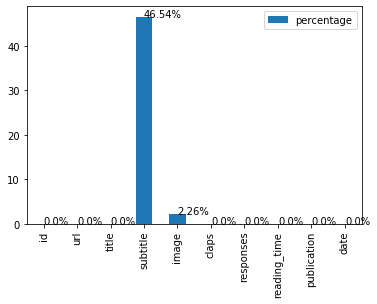

In [7]:
barchart = missing_df.plot.bar(y='percentage')

for index, percentage in enumerate(missing_percentage):
    barchart.text(index, percentage, str(percentage) + '%')

### 2. Feature Enigneering

#### Title → title_length

In [8]:
df['title_length'] = df['title'].apply(len)

#### Subtitle → with_subtitle

In [9]:
df['with_subtitle'] = np.where(df['subtitle'].isnull(), 'Yes', 'No')

#### Date → month

In [10]:
df['month'] = pd.to_datetime(df['date']).dt.month.apply(str)

In [11]:
df = df.drop(['id', 'subtitle', 'title', 'url', 'date', 'image', 'responses'], axis=1)

In [12]:
df.head(5)

,claps,reading_time,publication,title_length,with_subtitle,month
0,850,8,Towards Data Science,63,Yes,5
1,1100,9,Towards Data Science,63,Yes,5
2,767,5,Towards Data Science,28,No,5
3,354,4,Towards Data Science,59,No,5
4,211,4,Towards Data Science,69,No,5


In [13]:
num_list = []
cat_list = []

for column in df:
    if is_numeric_dtype(df[column]):
        num_list.append(column)
    elif is_string_dtype(df[column]):
        cat_list.append(column)    

print(num_list)
print(cat_list)


['claps', 'reading_time', 'title_length']
['publication', 'with_subtitle', 'month']


## 3. Univariate Analysis

Numerical Variables → histogram

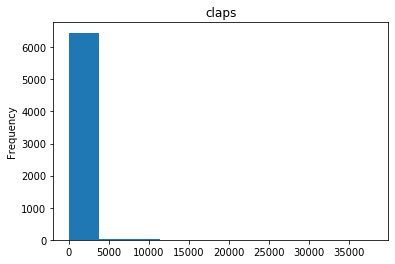

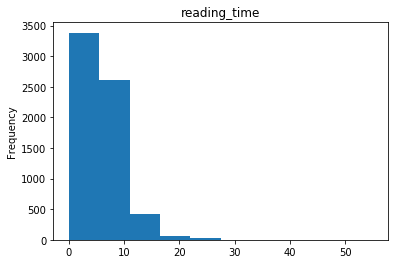

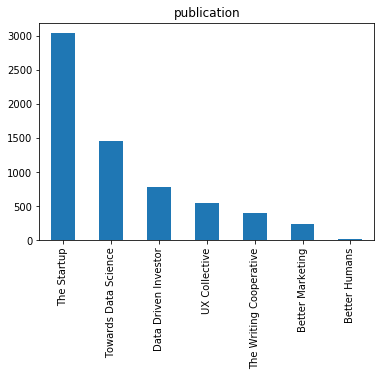

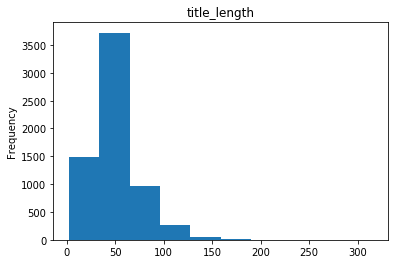

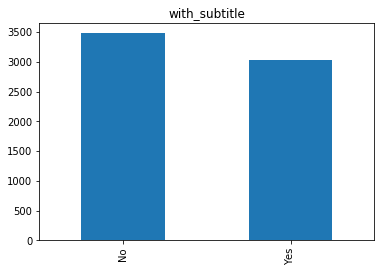

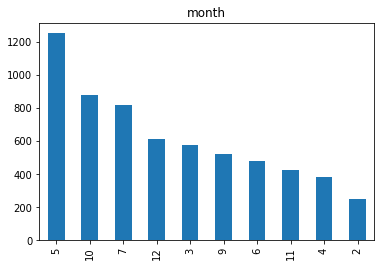

In [16]:
for column in df:
    plt.figure(column)
    plt.title(column)
    if is_numeric_dtype(df[column]):
        df[column].plot(kind = 'hist')
    elif is_string_dtype(df[column]):
        df[column].value_counts()[:10].plot(kind = 'bar')

- Most numbers of claps fall into the range between 0 and 5000. However, there must be some outliers with more than 35,000 claps, resulting in a heavily right-skewed graph
- The majority of articles have a title with around 50 characters, which may be a result of the SEO suggestions from Medium story setting. 
- In this sample of data, most articles are from "The Startup" publication and most of the articles are published in May.  

### 4. Multivariate Analysis

#### Numerical vs. Numerical → heat map or pairplot

Firstly, let's use the correlation matrix to find the correlation of all numeric data type columns. Then use a heat map to visualize the result. 

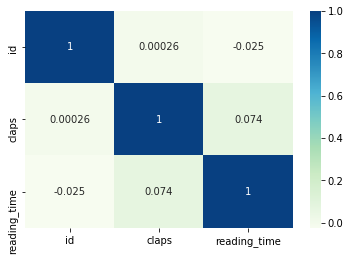

In [28]:
# correation matrix and heatmap
correlation = df.corr()
sns.heatmap(correlation, cmap="GnBu", annot= True)

Secondly, since the correlation matrix only indicates the strength of linear relationship, it is better to plot the numerical variables using seaborn function sns.pairplot()

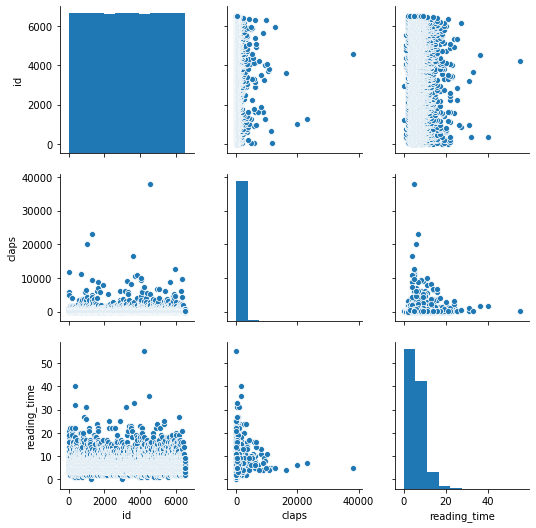

In [45]:
# pairplot
sns.pairplot(df, height=2.5)

#### Categorical vs. Categorical → countplot with hue

The relationship between two categorical variables can be visualized using grouped bar charts. The frequency of the primary categorical variables is broken down by the secondary category. This can be achieved using sns.countplot()

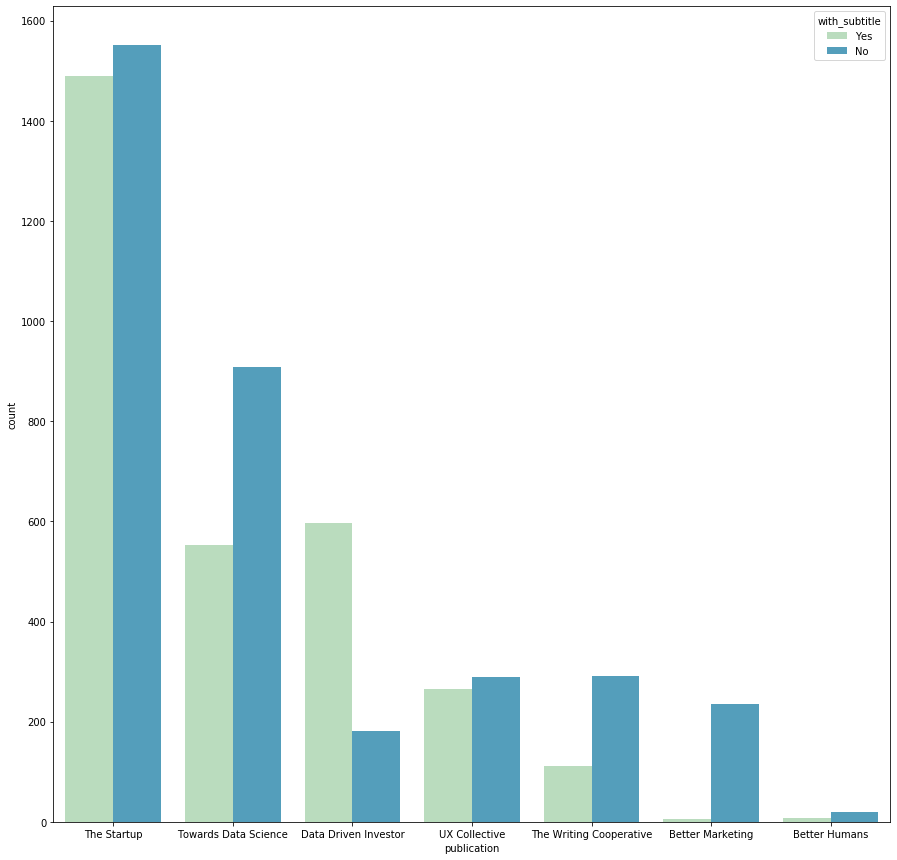

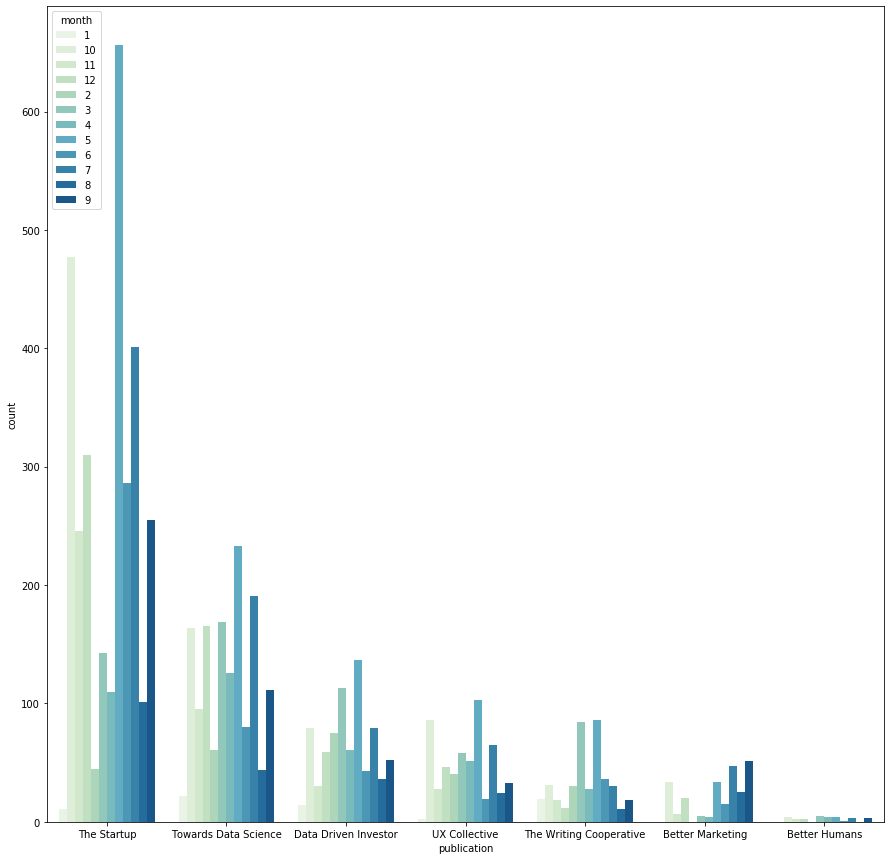

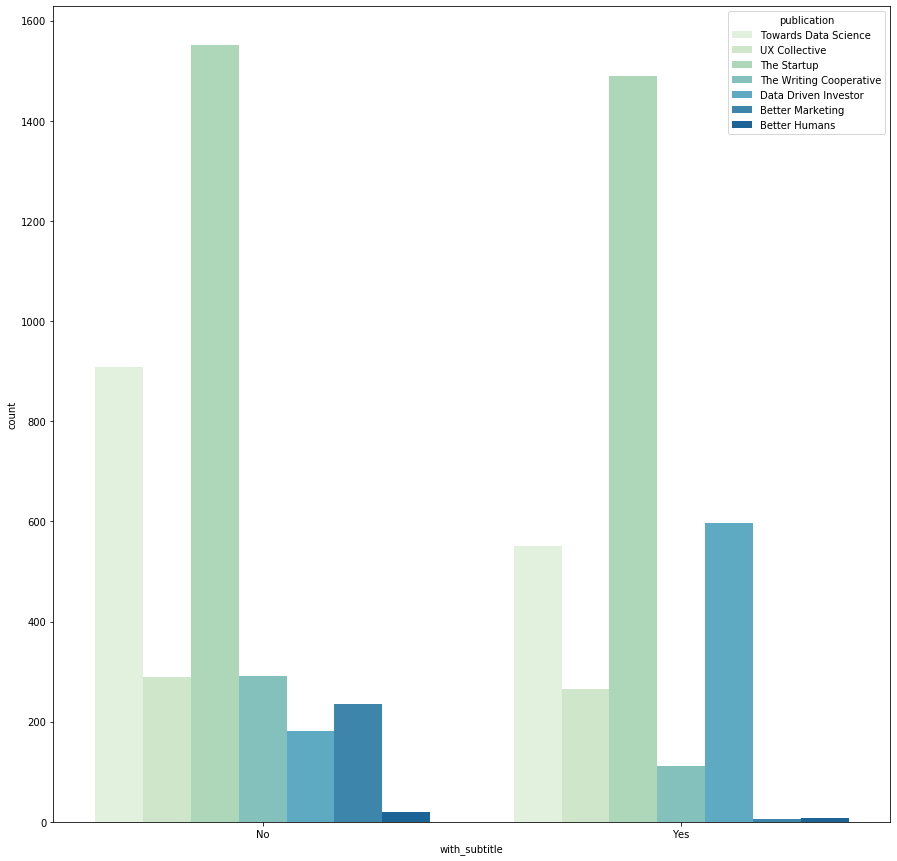

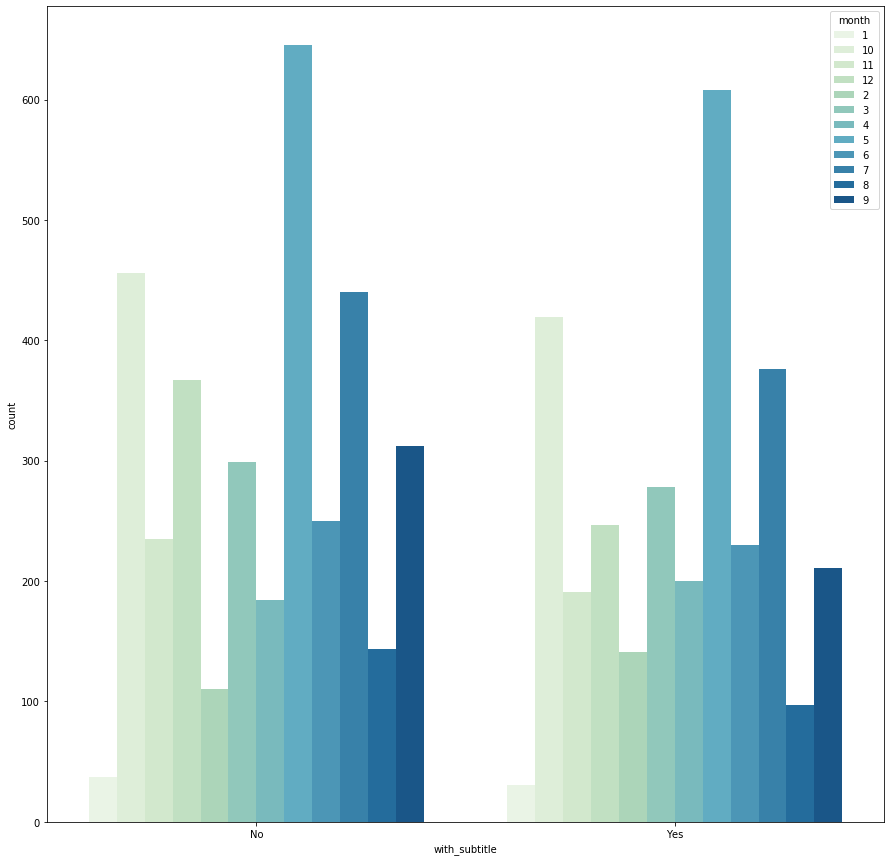

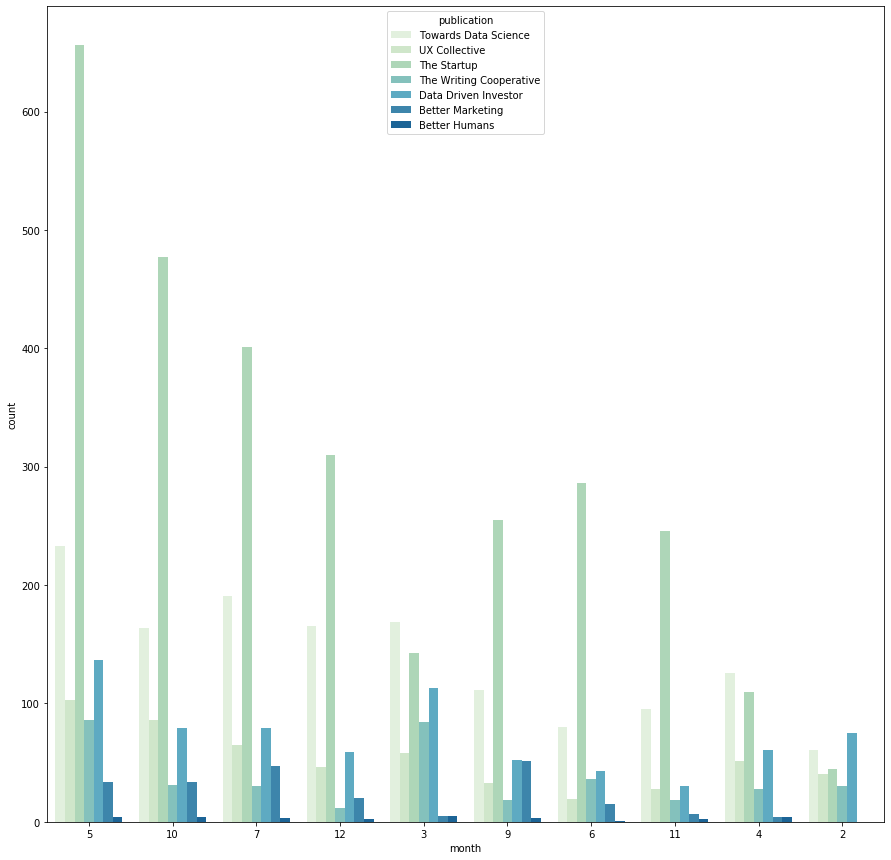

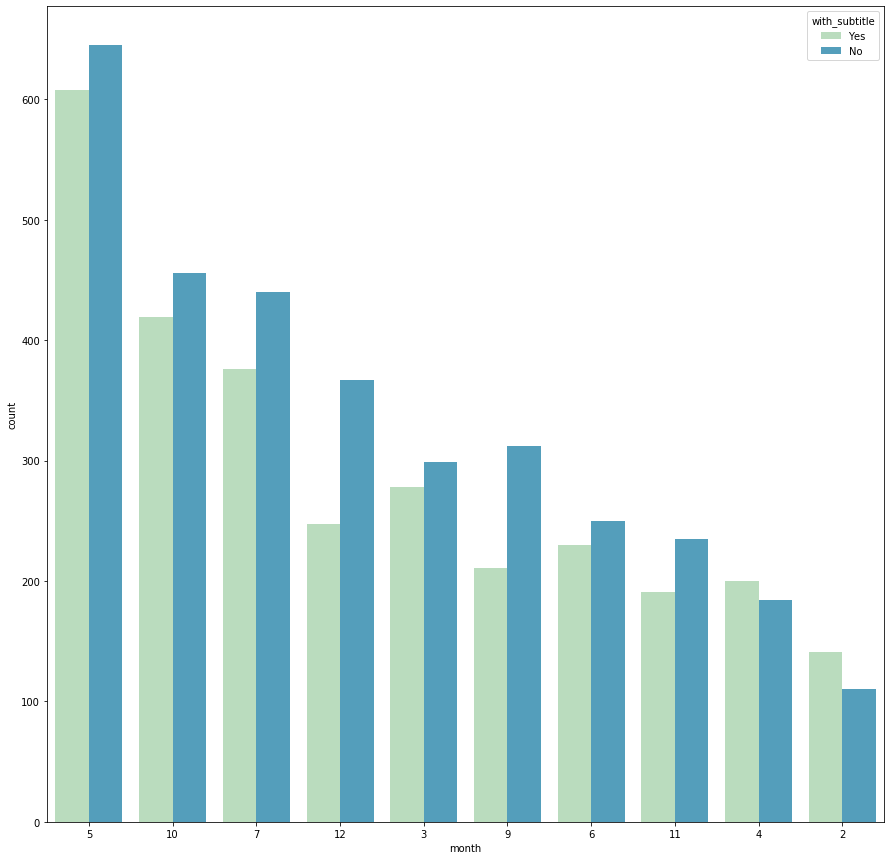

In [17]:
# grouped bar chart
for i in range(0, len(cat_list)):
    primary_cat = cat_list[i]
    for j in range(0, len(cat_list)):
        secondary_cat = cat_list[j]
        if secondary_cat != primary_cat:
            plt.figure (figsize = (15,15))
            chart = sns.countplot(
                data = df,
                x= primary_cat, 
                hue= secondary_cat,
                palette = 'GnBu',
                order=df[primary_cat].value_counts().iloc[:10].index #show only TOP10
            )

#### Categorical vs. Numerical → boxplot or pairplot with hue
Boxplot is usually adopted when we need to compare how numerical data varies across groups. It is an intuitive way to graphically depict if the variation in categorical features contributes to the difference in values, which can be additionally quantified using ANOVA analysis. 

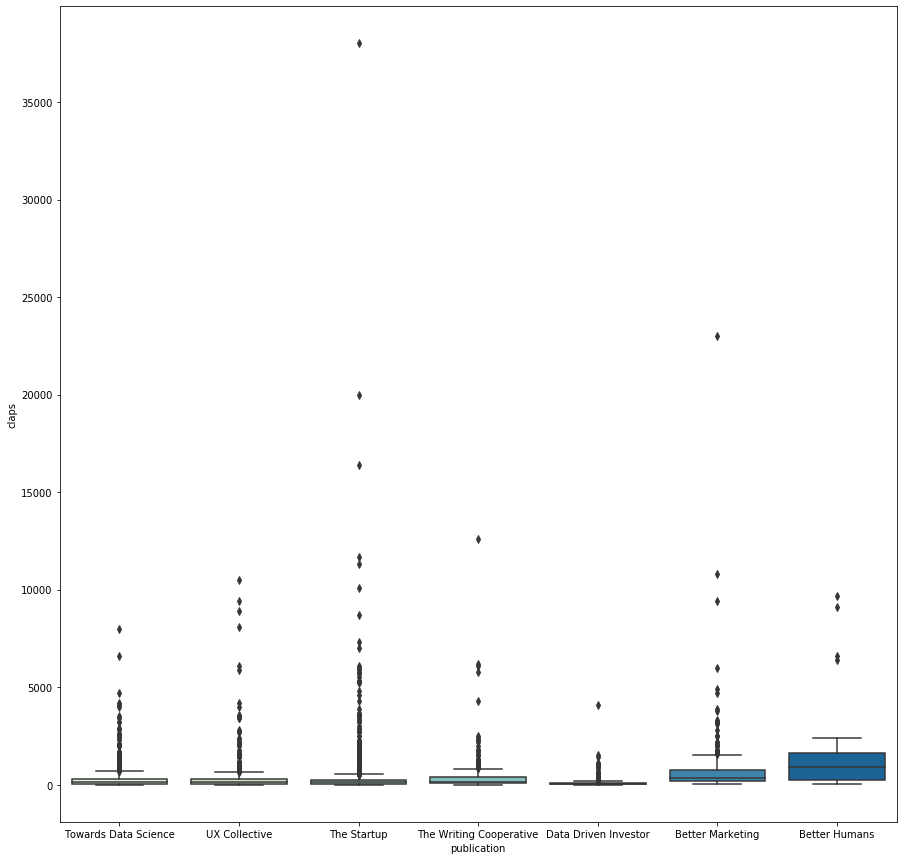

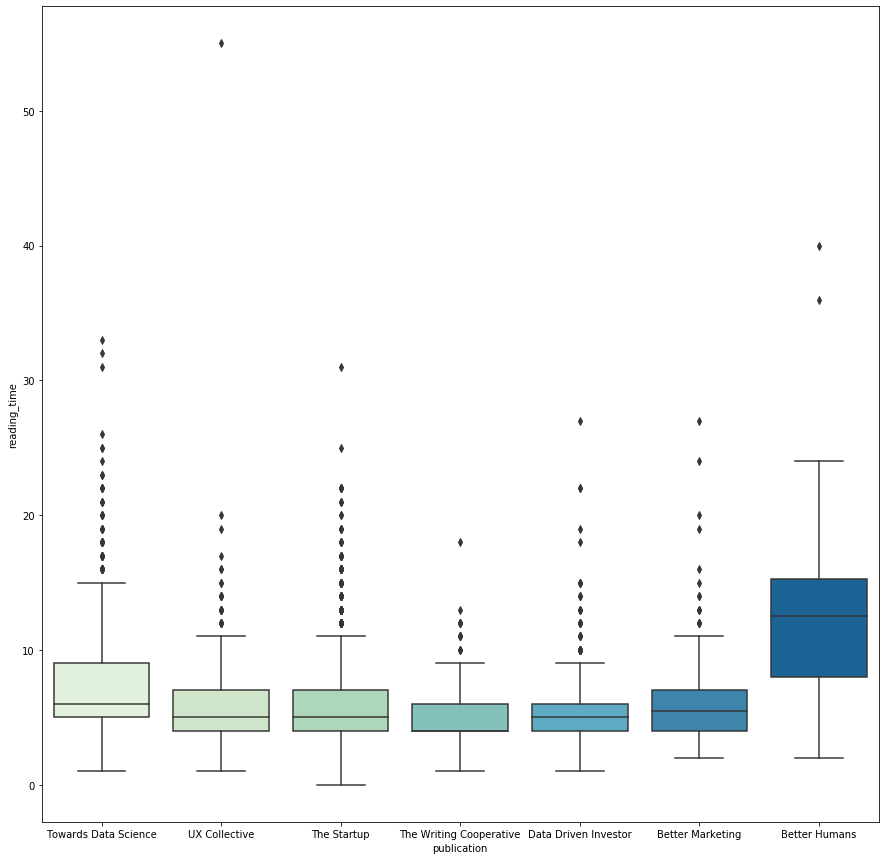

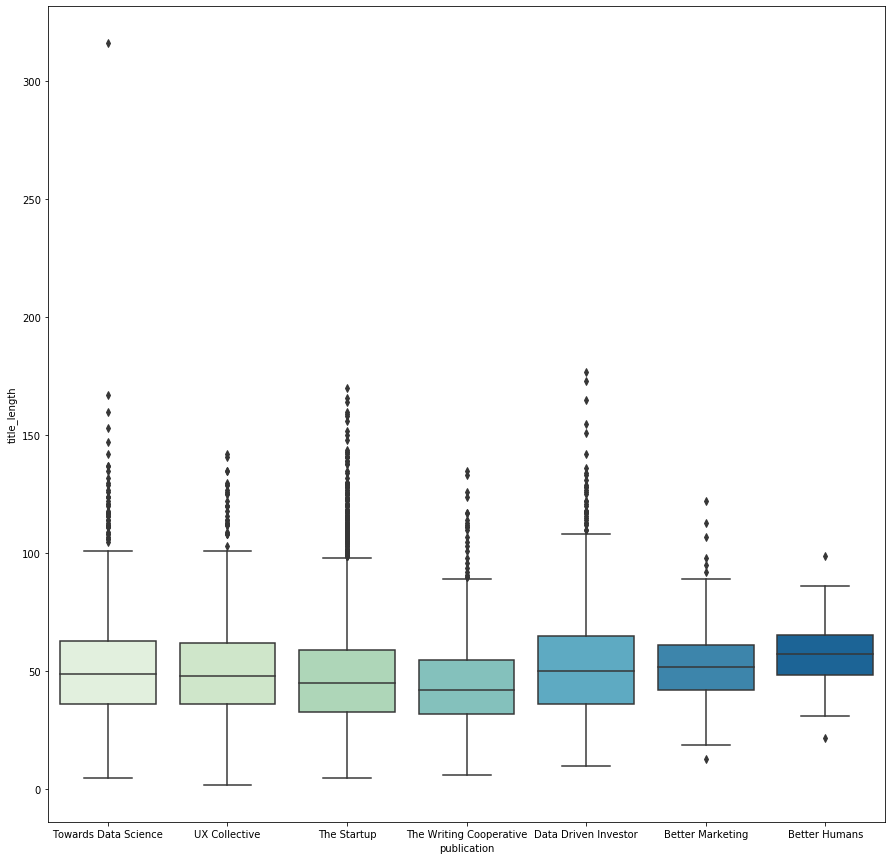

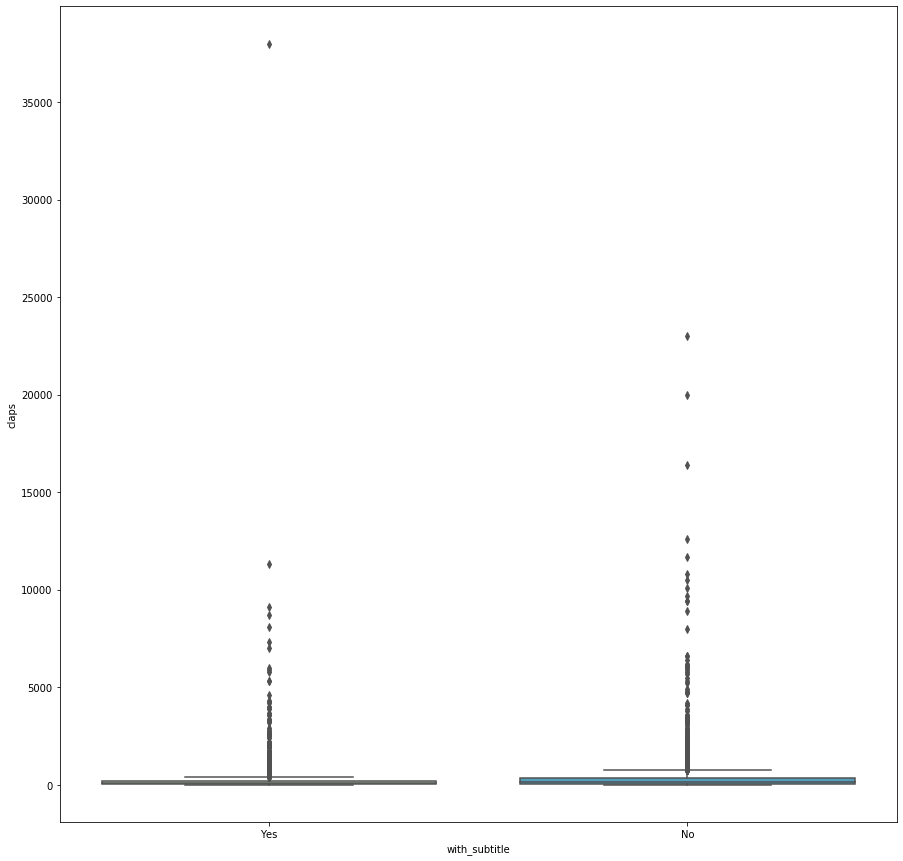

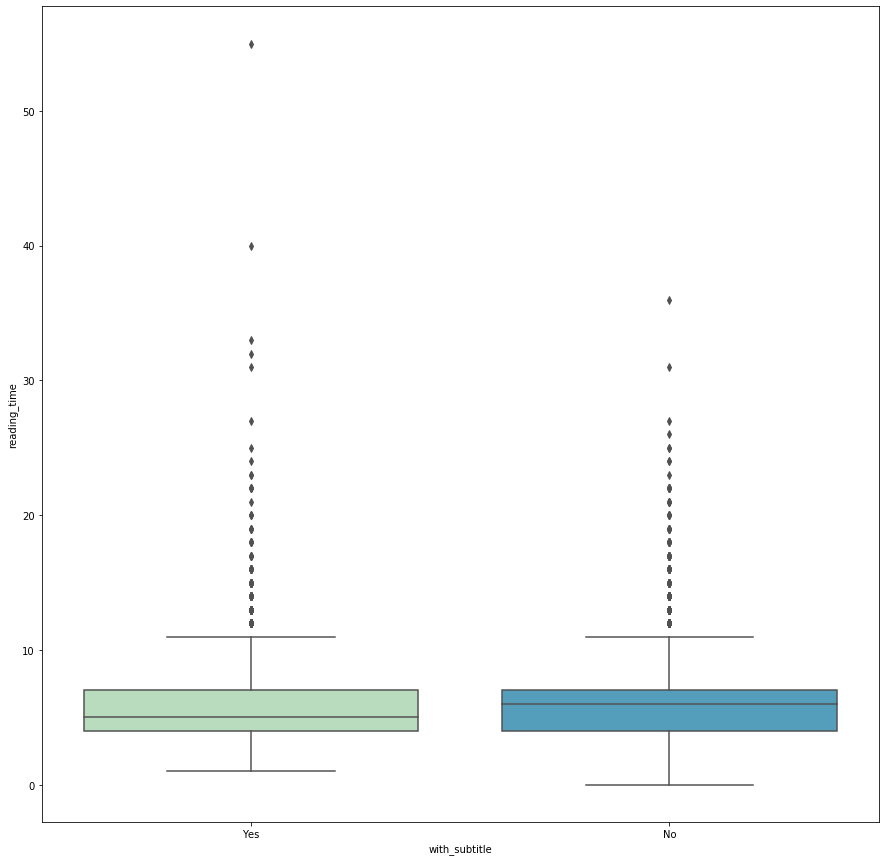

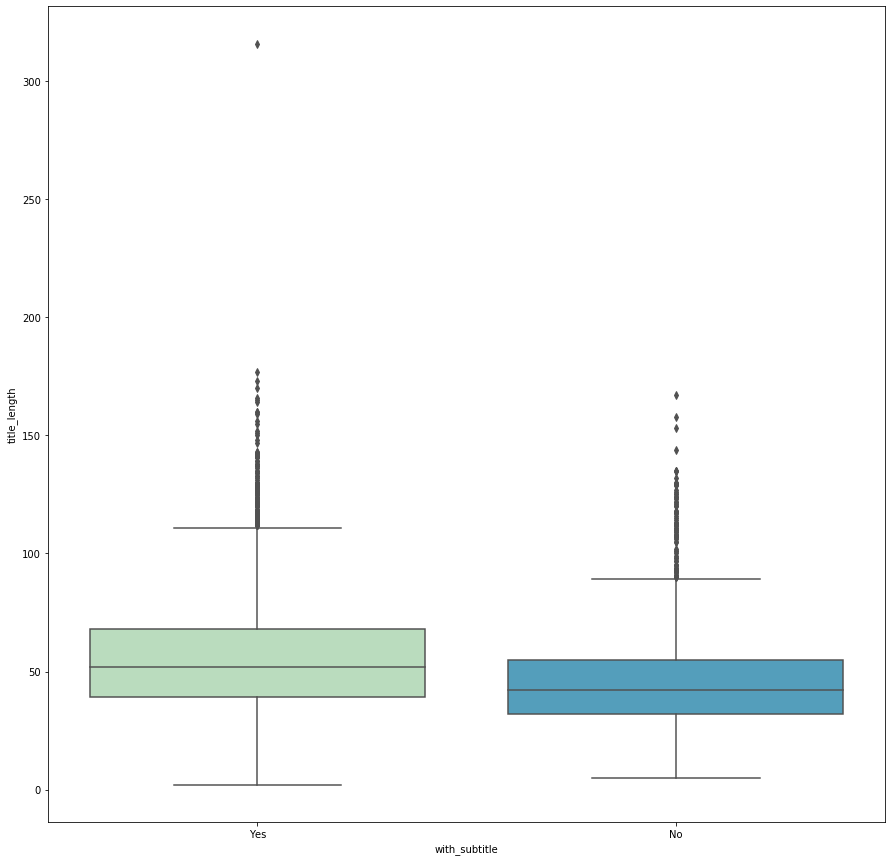

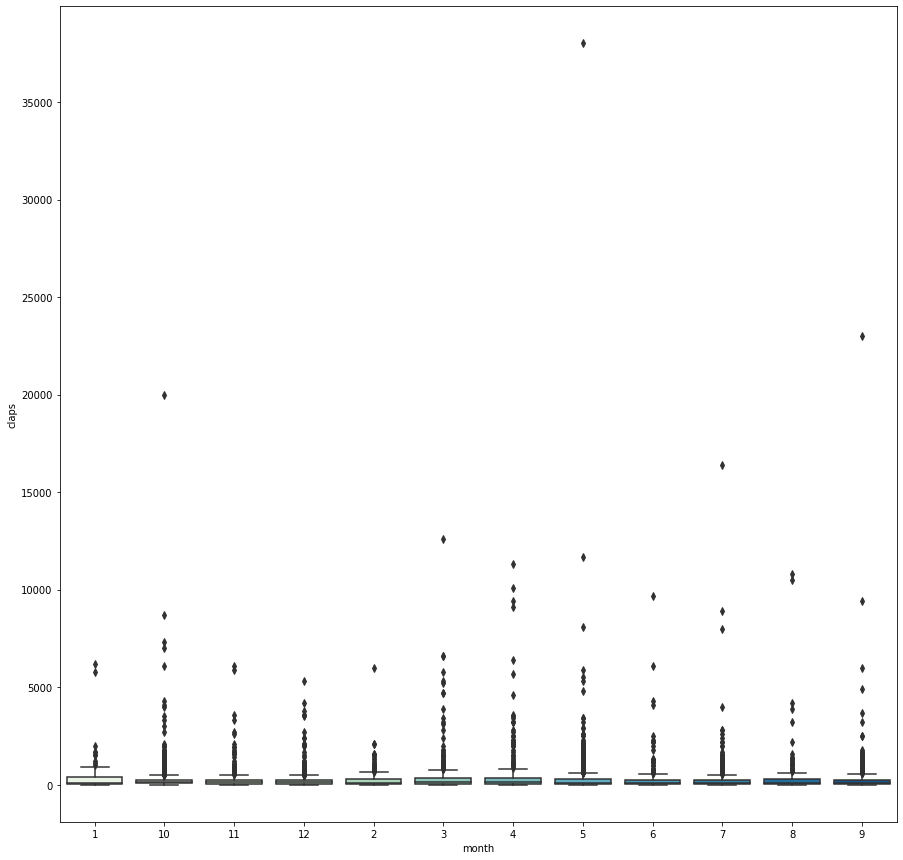

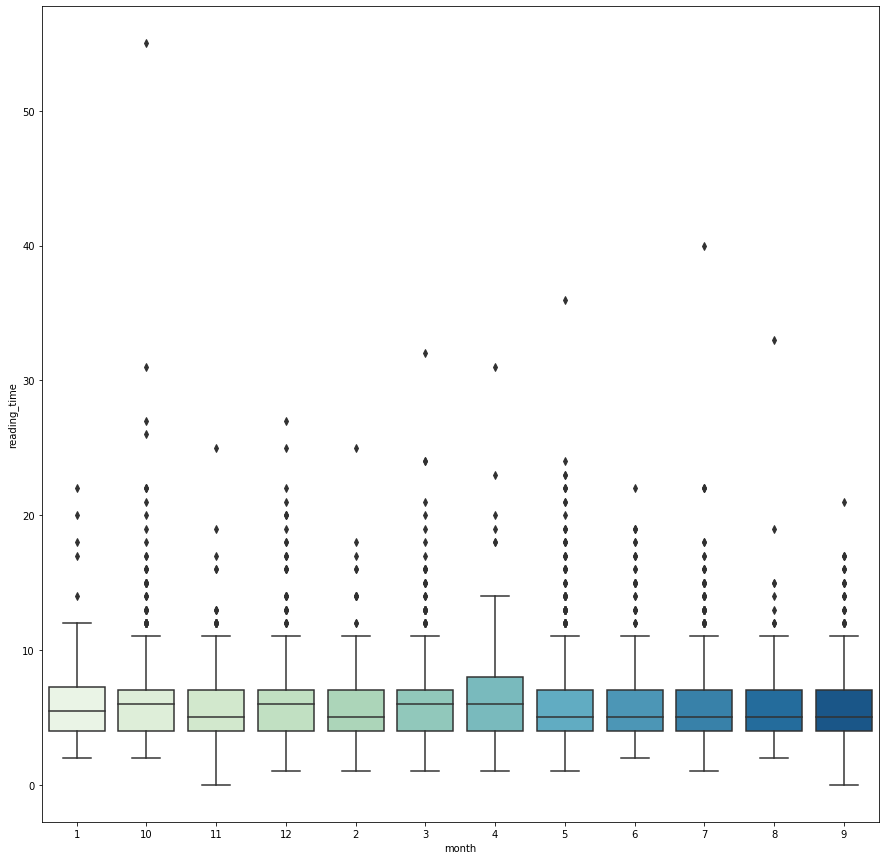

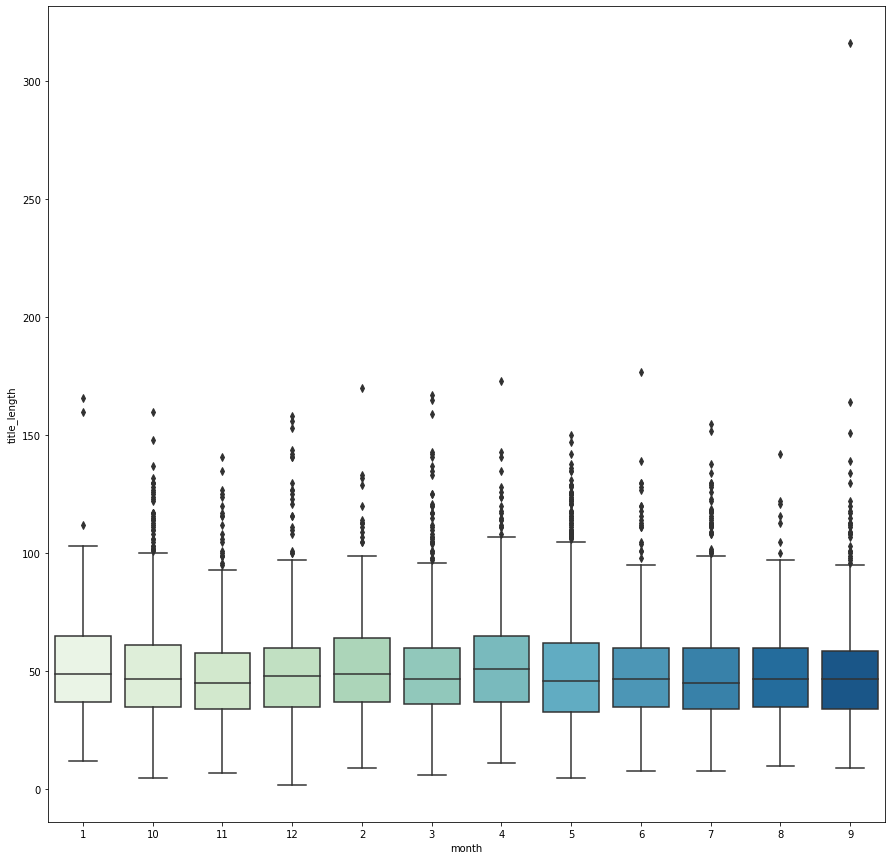

In [31]:
# box plot
for i in range(0, len(cat_list)):
    cat = cat_list[i]
    for j in range(0, len(num_list)):
        num = num_list[j]
        plt.figure (figsize = (15,15))
        sns.boxplot( x = cat, y = num, data = df, palette = "GnBu")

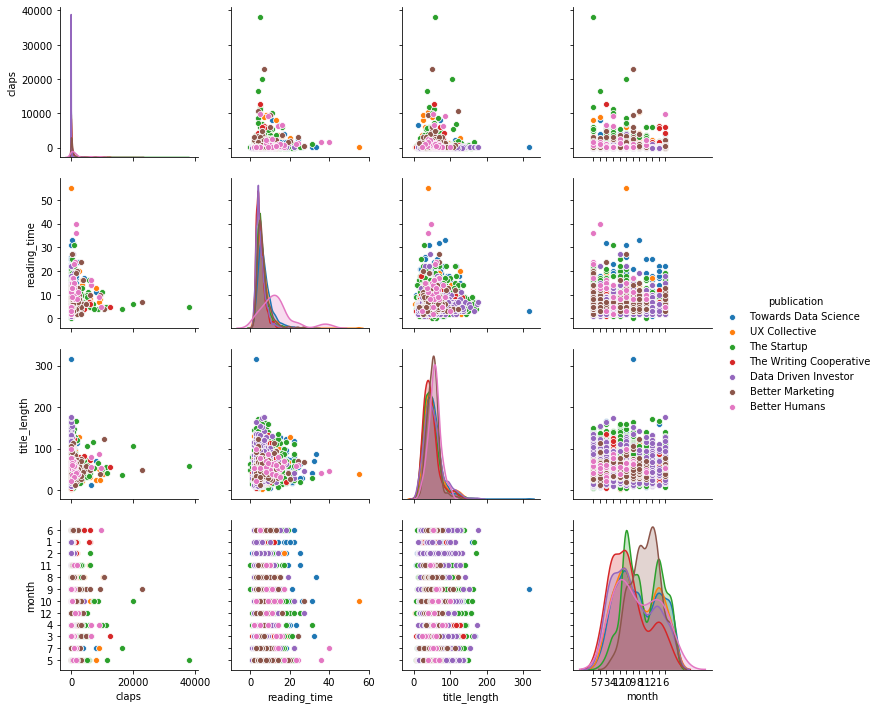

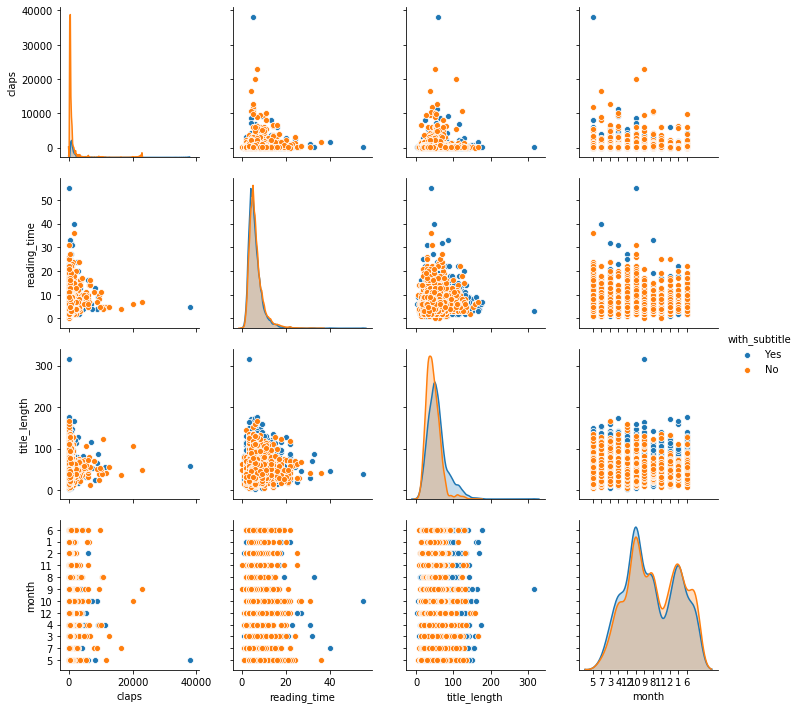

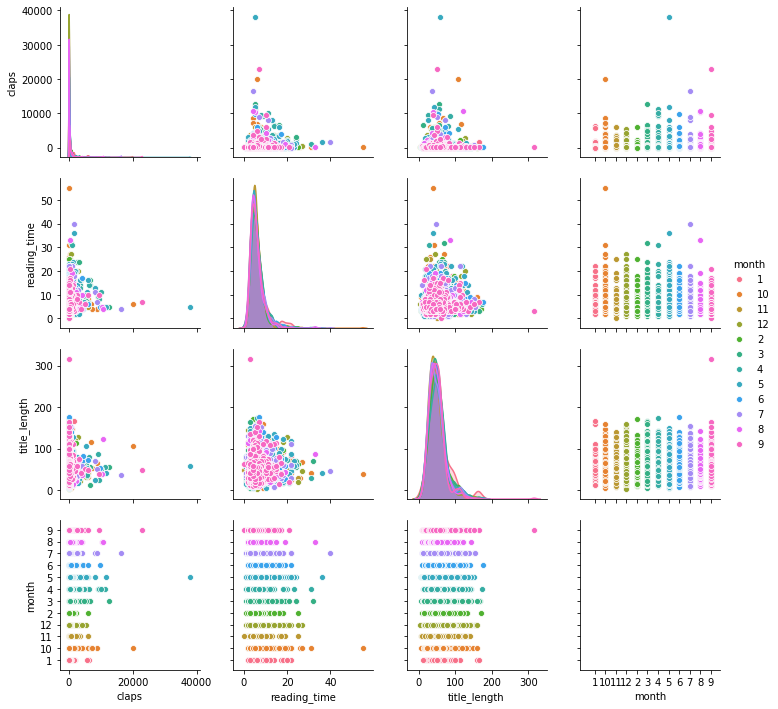

In [29]:
# pairplot with hue
for i in range(0, len(cat_list)):
    hue_cat = cat_list[i]
    sns.pairplot(df, hue = hue_cat)

## In Summary
1. Know Your Data: have a bird's view of the characteristics of the dataset. 
2. Feature Engineering: transform variables into something more insightful.
3. Univariate Analysis: 1) histogram to visualize numerical data; 2) bar chart to visualize categorical data.
4. Multivariate Analysis: 1) Numerical vs. Numerical: correlation matrix, scatterplot (pairplot); 2) Categorical vs. Categorical: Grouped bar chart; 3) Numerical vs. Categorical: pairplot with hue, box plot. 

reference
https://www.visual-design.net/post/semi-automated-exploratory-data-analysis-process-in-python